<a href="https://colab.research.google.com/github/shahzd11/PSDV_exposition_assignment/blob/main/Datashader_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datashader (Python)
<img src="https://github.com/holoviz/datashader/raw/main/doc/_static/logo_horizontal.svg" data-canonical-src="https://github.com/holoviz/datashader/raw/main/doc/_static/logo_horizontal.svg" width="400"/><br>
*Datashader turns even the largest datasets into images, faithfully preserving the data’s distribution.* ~[Datashader Official Website](https://datashader.org/getting_started/Introduction.html)

## Introduction

When working with large datasets, traditional visualization libraries like Matplotlib and Seaborn struggle with performance and clarity. These libraries plot individual data points, which can lead to over-plotting and slow rendering when handling millions or billions of points. Datashader, an open-source Python library, solves this problem by rasterizing data into a grid-based format, which is then converted into an image instead of plotting individual points. This ensures that all data is represented without over-plotting, making visualization clearer and more scalable.







### Why Traditional Visualization Tools Fail

Most common plotting libraries, such as Matplotlib, Seaborn, and Plotly, render each data point individually. This works well for small datasets but quickly becomes inefficient for large datasets due to:

* Over-plotting: When too many points overlap, important patterns become hidden.

* Performance Issues: Processing millions of data points requires significant computational resources.

* Cluttered Visuals: Traditional scatter plots become unreadable when dealing with large datasets.




*To overcome these challenges, we need an alternative approach: Datashader.*


### Key Features of Datashader

1. Rasterization of Large Datasets: Converts millions/billions of points into a summarized, readable image.

2. Automatic Data Aggregation: Uses binning techniques to efficiently represent large-scale data. Automatically adjusts the visualization based on zoom level and density.

3. Scalability & Compatibility: Handles datasets that traditional visualization tools cannot. Integration with Pandas, Dask, and GeoPandas: Works seamlessly with big data frameworks.

4. Customizable Pipelines: Allows flexible transformations and styling.

## Installing Datashader

To get started, you need to install Datashader along with holoviews, hvplot, and dask for better compatibility using pip.

You’ll also need NumPy, Pandas, and Matplotlib for working with data.

In [ ]:
!pip install datashader
!pip install holoviews hvplot dask
!pip install jupyter_bokeh
!pip install numpy pandas matplotlib

In [ ]:
import datashader as ds
import holoviews as hv, pandas as pd, numpy as np, colorcet as cc
import hvplot.pandas
from holoviews.element.tiles import EsriImagery
import datashader.transfer_functions as tf
from holoviews.operation.datashader import rasterize
from holoviews.operation.datashader import datashade
from IPython.display import display
hv.extension('bokeh')

## Reading the Data
Let's take a practical scenario of evaluating NYC Taxi dataset

In [ ]:
# Using a paraquet dataset for easy column extraction!
df = pd.read_parquet(
    'https://s3.amazonaws.com/datashader-data/nyc_taxi_wide.parq',
    columns = ['dropoff_x', 'dropoff_y']
)

In [ ]:
print(len(df)) # the data set is pretty large
print("The Dataset has approx 12 million data points!")
df.head()

11842094
The Dataset has approx 12 million data points!


dropoff_x  dropoff_y
0 -8234835.5  4975627.0
1 -8237020.5  4976875.0
2 -8232279.0  4986477.0
3 -8238124.0  4971127.0
4 -8238107.5  4974457.0

Using python .plot fuction let's plot a scatter plot of 2 columns from our dataset.

CPU times: user 626 ms, sys: 315 ms, total: 941 ms
Wall time: 937 ms


<Axes: xlabel='dropoff_x', ylabel='dropoff_y'>

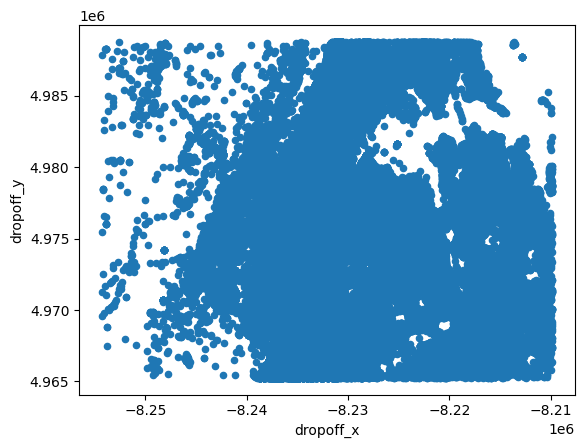

In [ ]:
%%time
# it's so slow
# the plot is shabby and incomprehensible
# No concrete pattern can be drawn
df.plot.scatter('dropoff_x', 'dropoff_y')

## Plotting Using Datashader

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

CPU times: user 3.81 s, sys: 89.8 ms, total: 3.9 s
Wall time: 4.86 s


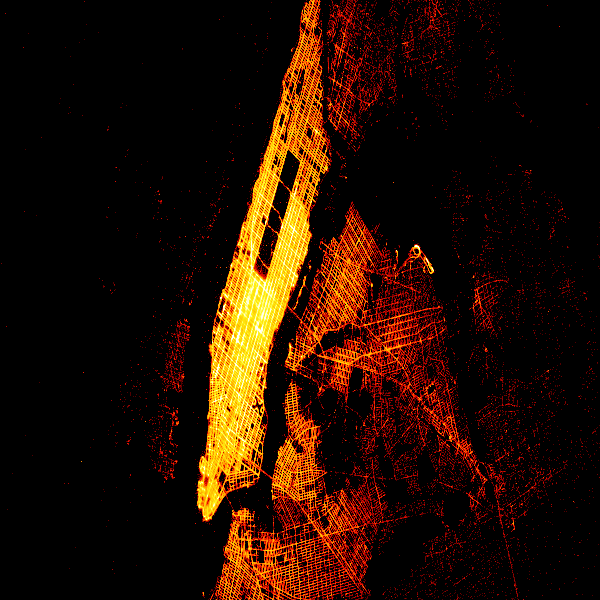

In [ ]:
%%time
agg = ds.Canvas().points(df, 'dropoff_x', 'dropoff_y')
ds.tf.set_background(ds.tf.shade(agg, cmap=cc.fire), "black")

Getting a plot like this with other approaches would take quite a bit of time and effort, but with Datashader it appears in milliseconds without trial and error.

The output above is just a bare image, which is all that Datashader knows how to generate directly. But Datashader can integrate closely with Bokeh, HoloViews, and GeoViews, which makes it simple to allow interactive zooming, axis labeling, overlays and layouts, and complex web apps. For example, making a zoomable interactive overlay on a geographic map requires just a few more lines of code:

In [ ]:
%%time
map_tiles = EsriImagery().opts(alpha=0.5, width=900, height=480, bgcolor='black')
points = hv.Points(df, ['dropoff_x', 'dropoff_y'])
taxi_trips = datashade(points, cmap=cc.fire, width=900, height=480) # Datashade for Rasterized plot

# Display the visualization
display(map_tiles * taxi_trips)

BokehModel(combine_events=True, render_bundle={'docs_json': {'c3f71b96-a761-4feb-ac57-10abf8507813': {'version…

CPU times: user 767 ms, sys: 25.9 ms, total: 793 ms
Wall time: 795 ms


Datashader made it incredibly easy and efficient to create a detailed and comprehensible scatter plot with just four lines of code by significantly reducing processing time.

This powerful library streamlines data visualization by following a five-step pipeline:
1. **Projection**  
Maps raw data points into a coordinate space suitable for visualization.  
2. **Aggregation**    
Groups and summarizes data into a fixed grid, reducing complexity.  
3. **Transformation**    
Applies scaling, filtering, or mathematical operations to refine the data.  
4. **Colormapping**      
Assigns colors based on data values to enhance interpretability.  
5. **Embedding**     
Renders the processed image into a final visual output for display.

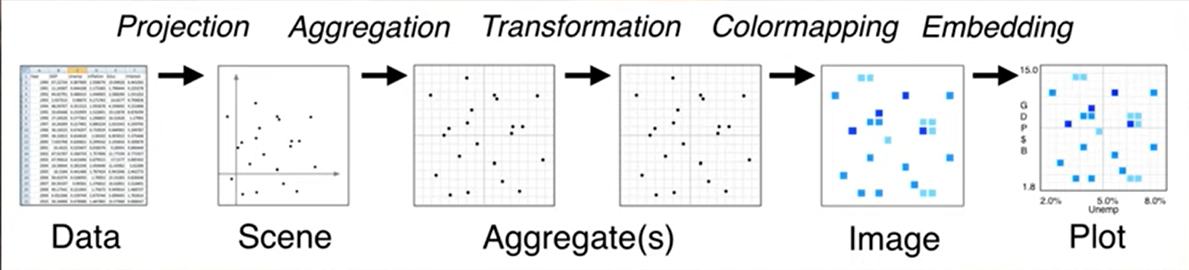

## Projection

In [ ]:
canvas = ds.Canvas(plot_width=900, plot_height=480)
canvas

## Aggregation

In [ ]:
canvas.points(df, 'dropoff_x', 'dropoff_y', agg=ds.count())

<xarray.DataArray (dropoff_y: 480, dropoff_x: 900)> Size: 2MB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
Coordinates:
  * dropoff_x  (dropoff_x) float64 7kB -8.254e+06 -8.254e+06 ... -8.21e+06
  * dropoff_y  (dropoff_y) float64 4kB 4.965e+06 4.965e+06 ... 4.989e+06
Attributes:
    x_range:  (-8254332.0, -8209813.5)
    y_range:  (4965255.5, 4988769.5)

## Transformation (optional)
Can perform various transformations using Datashader such as selection, masking, etc

In [ ]:
# Here we are squaring the data points to enhance the density and reveal details in dense regions.
np.power(canvas.points(df, 'dropoff_x', 'dropoff_y', agg=ds.count()),2)

<xarray.DataArray (dropoff_y: 480, dropoff_x: 900)> Size: 2MB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
Coordinates:
  * dropoff_x  (dropoff_x) float64 7kB -8.254e+06 -8.254e+06 ... -8.21e+06
  * dropoff_y  (dropoff_y) float64 4kB 4.965e+06 4.965e+06 ... 4.989e+06
Attributes:
    x_range:  (-8254332.0, -8209813.5)
    y_range:  (4965255.5, 4988769.5)

## Colormapping

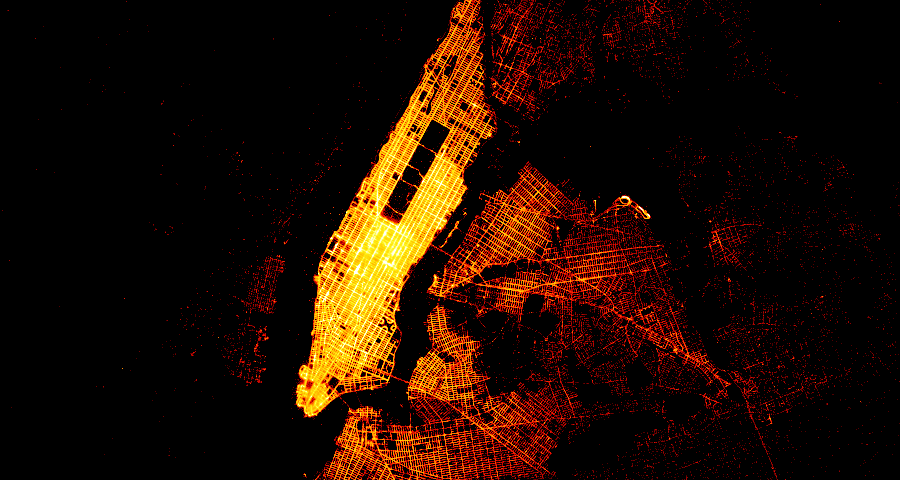

In [ ]:
tf.set_background(
    tf.shade(
        canvas.points(df, 'dropoff_x', 'dropoff_y', agg=ds.count()),
        cmap=cc.fire
    ),
    'black'
)

## Embedding

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
map_tiles = EsriImagery().opts(alpha=0.5, width=900, height=480, bgcolor='black')
points = hv.Points(df, ['dropoff_x', 'dropoff_y'])
ropts = dict(tools=['hover'], colorbar=True, colorbar_position='bottom', cmap=cc.fire, cnorm='eq_hist')
taxi_trips = rasterize(points).opts(**ropts)
display(map_tiles * taxi_trips)

BokehModel(combine_events=True, render_bundle={'docs_json': {'c0475a88-5e84-48c2-b5f5-fdb73d96bc97': {'version…

## Conclusion
### When to use this library:
Use this when you have a very large data set. If you find this visualization aesthetically appealing then you can use this for smaller datasets as well, but the results will depend on the density distribution of your data. You won’t get high interactivity, because datashader prioritizes performance and clarity as it overlays images rather than
vector-based plots. But you can still zoom and pan the visualization.

### Practical Applications of Datashader

Datashader is widely used in fields that require **high-performance visualization of large datasets**. Here are some key applications:  

##### **1. Geospatial Data Visualization**
   - **Example:** Mapping **millions of GPS coordinates** from taxi rides, earthquakes, or population data.  
   - **Why Datashader?** Efficiently renders **dense clusters** without losing detail.  
   
##### **2. Finance and Market Analysis**   
   - **Example:** Visualizing **high-frequency trading data**, stock market trends, or large-scale financial transactions.  
   - **Why Datashader?** Handles **billions of data points** quickly, revealing patterns in market fluctuations.  

##### **3. Scientific and Medical Research**  
   - **Example:** Processing and visualizing **genomic data, brain imaging, or large-scale simulations**.  
   - **Why Datashader?** Helps analyze complex, high-dimensional datasets **without information loss**.  

##### **4. Social Media & Network Analysis**   
   - **Example:** Tracking **user activity, sentiment analysis**, or **connection patterns** in networks like Twitter.  
   - **Why Datashader?** Helps visualize **millions of interactions** and detect trends in online behavior.  

##### **6. Machine Learning & AI Model Debugging**
   - **Example:** Understanding **high-dimensional feature distributions** or **anomaly detection** in ML datasets.  
   - **Why Datashader?** Enables fast exploration of large datasets **without performance bottlenecks**.  




#### References & Further Reading:
Documentatiom & Articles
* [Datashader](https://datashader.org/index.html)
* [(Plotly + Datashader) Visualizing Large Geospatial Datasets](https://medium.com/tech-carnot/plotly-datashader-visualizing-large-geospatial-datasets-bea27b9d7824)

Yotube Resources
* [Big Data Visualization Using Datashader in Python | How does Datashader work and why is it so fast?](https://youtu.be/U6dyIRolIhI?si=nJQjI4jAyVClEr2a)
* [Datashader Revealing the Structure of Genuinely Big Data | SciPy 2016 | James A Bednar](https://youtu.be/6m3CFbKmK_c?si=O1juqw58f7O0Z2AC)
* [Datashader in 15 Minutes | Machine Learning & Data Science ](https://youtu.be/n4cFwPan59I?si=JXC12aLPWaZOtugs)

In [ ]:
!jupyter nbconvert --to html
"Datashader (Python).ipynb"

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

'Datashader (Python).ipynb'